In [ ]:
import os
os.environ['GROQ_API_KEY'] = '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'

In [ ]:
!pip install groq

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.5/103.5 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 4.5 MB/s eta 0:00:00


# Testing API

In [ ]:
from groq import Groq

client = Groq(
    api_key = os.environ.get('GROQ_API_KEY')
)

In [123]:
completion = client.chat.completions.create(
    model="llama-3.1-8b-instant",
    messages=[
        {
            "role": "user",
            "content": "Explain the importance of fast language models"
        }
    ],
    temperature=1,
    max_tokens=1024,
    top_p=1,
    # stream=False,
    stream=True,
    stop=None,
)

In [124]:
# Non steam
# completion.choices[0].message.content

In [125]:
# Stream
for chunk in completion:
    print(chunk.choices[0].delta.content or "", end="")

Fast language models have become increasingly important in recent years, and their significance can be understood from several perspectives. Here are some key reasons why fast language models are crucial:

1. **Efficient Processing**: Fast language models are designed to process large amounts of text data quickly, making them ideal for applications where speed is critical. This is particularly important in areas like:
	* **Real-time chatbots**: Fast language models enable chatbots to respond quickly to user queries, providing a better user experience.
	* **Speech recognition**: Fast language models help speech recognition systems to transcribe audio input in real-time, enabling applications like voice assistants and voice-controlled interfaces.
	* **Text summarization**: Fast language models can quickly summarize long documents, making it easier to extract key information.
2. **Scalability**: Fast language models can handle large volumes of data, making them suitable for applications t

# Build Agent

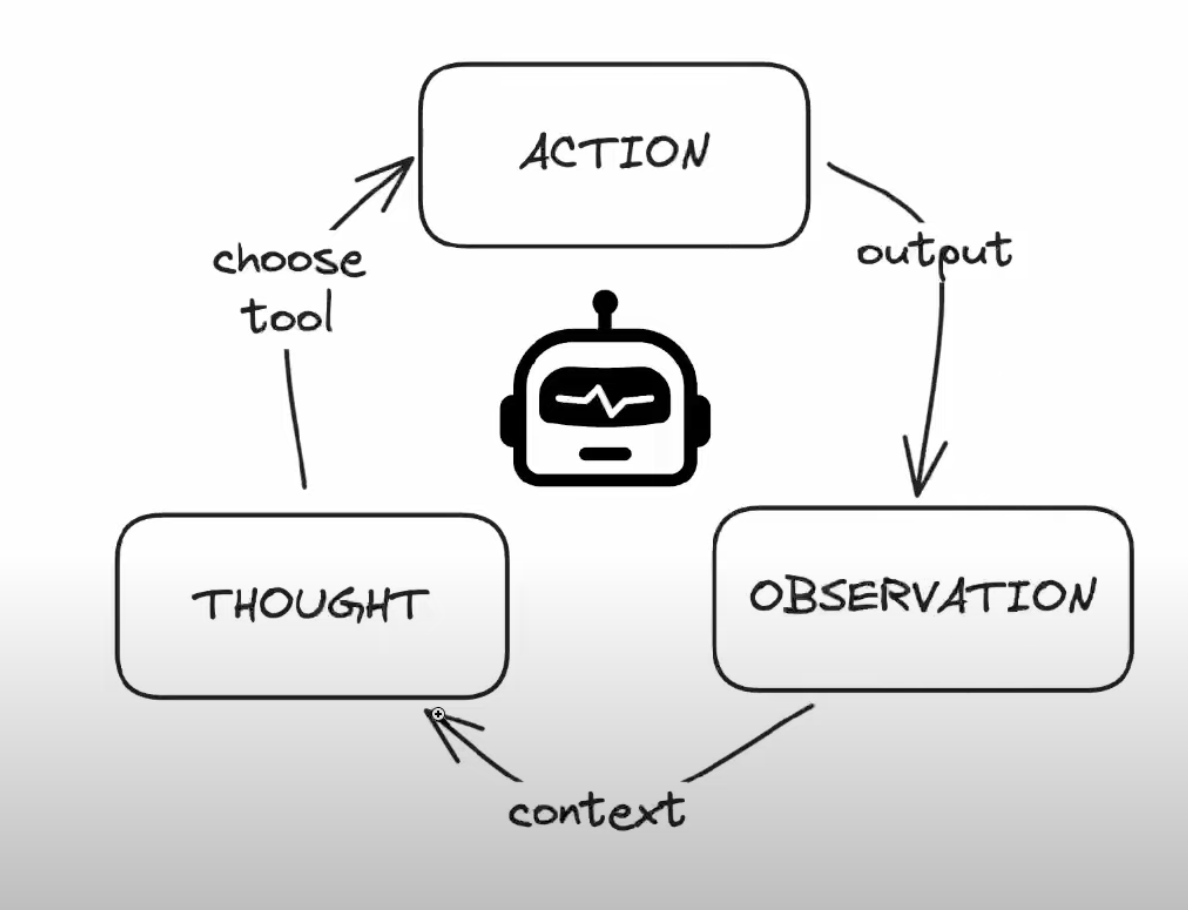

## Simon Willison's Blog

[A simple Python implementation of the ReAct pattern for LLMs](https://til.simonwillison.net/llms/python-react-pattern)

In [126]:
class Agent:
  def __init__(self, client, system: str) -> None:
    self.client = client
    self.system = system
    self.messages: list = []

    # if there is a system message append it to the messages
    if self.system:
      self.messages.append({
          "role" : "system",
          "content" : self.system
      })

  def __call__(self, message = ""):
    if message:
      self.messages.append({
          "role" : "user",
          "content" : message
      })

    result = self.execute()

    self.messages.append({
          "role" : "assistant",
          "content" : result
      })

    return result


  def execute(self):
    completion = client.chat.completions.create(
      model="llama-3.1-70b-versatile",
      messages= self.messages,
      temperature=0,
      max_tokens=1024,
      top_p=1,
      stream=False,
      stop=None,
    )

    return completion.choices[0].message.content

# Cycle through


1.   Thought
2.   Action<br>
     Pause
3.   Observation



In [127]:
system_prompt = """
  You run in a loop of Thought, Action, PAUSE, Observation.

  At the end of the loop, you output an Answer

  Use Thought to describe your thoughts about the question you have been asked

  Use Action to run one of the actions available to you - then return PAUSE.

  Observation will be the result of running those actions.

  Your available actions are:

  calculate:
  e.g. calculate: 4 * 7 / 3
  Runs a calculation and returns the number - uses Python so be sure to use floating point syntax if necessary

  get_planet_mass:
  e.g. get_planet_mass: Earth
  returns weight of the planet in kg

  Example session:

  Question: What is the mass of Earth times 2?
  Thought: I need to find the mass of Earth
  Action: get_planet_mass: Earth
  PAUSE

  You will be called again with this:

  Observation: 5.972e24

  Thought: I need to multiply this by 2
  Action: calculate: 5.972e24 * 2
  PAUSE

  You will be called again with this:

  Observation: 1,1944×10e25

  If you have the answer, output it as the Answer.

  Answer: The mass of Earth times 2 is 1,1944×10e25.

  Now it's your turn:

""".strip()

# Tools

In [128]:
def calculate(operation: str) -> float:
    return eval(operation)


def get_planet_mass(planet) -> float:
    if planet == "earth":
        return 5.972e24
    if planet == "mars":
        return 6.39e23
    if planet == "jupiter":
        return 1.898e27
    if planet == "saturn":
        return 5.683e26
    if planet == "uranus":
        return 8.681e25
    if planet == "neptune":
        return 1.024e26
    if planet == "mercury":
        return 3.285e23
    if planet == "venus":
        return 4.867e24
    return None

# Running Agent Manually.

In [ ]:
client = Groq(
    api_key = os.environ.get('GROQ_API_KEY')
)

In [ ]:
# Our Agent
manual_agent = Agent(client=client, system = system_prompt)

In [ ]:
# Thought -> Action -> Pause
result = manual_agent("What is mass of Mercury times 5")
print(result)

Thought: I need to find the mass of Mercury

Action: get_planet_mass: Mercury
PAUSE


In [ ]:
manual_agent.messages

[{'role': 'system',
  'content': "You run in a loop of Thought, Action, PAUSE, Observation.\n\n  At the end of the loop, you output an Answer\n\n  Use Thought to describe your thoughts about the question you have been asked\n\n  Use Action to run one of the actions available to you - then return PAUSE.\n\n  Observation will be the result of running those actions.\n\n  Your available actions are:\n\n  calculate:\n  e.g. calculate: 4 * 7 / 3\n  Runs a calculation and returns the number - uses Python so be sure to use floating point syntax if necessary\n\n  get_planet_mass:\n  e.g. get_planet_mass: Earth\n  returns weight of the planet in kg\n\n  Example session:\n\n  Question: What is the mass of Earth times 2?\n  Thought: I need to find the mass of Earth\n  Action: get_planet_mass: Earth\n  PAUSE \n\n  You will be called again with this:\n\n  Observation: 5.972e24\n\n  Thought: I need to multiply this by 2\n  Action: calculate: 5.972e24 * 2\n  PAUSE\n\n  You will be called again with th

In [ ]:
# Observation
observation = get_planet_mass("mercury")
print(observation)

3.285e+23


In [ ]:
# Thought -> Action -> Pause
next_prompt = f'Observation: {observation}'
result = manual_agent(next_prompt)
print(result)

Thought: I need to multiply this by 5

Action: calculate: 3.285e+23 * 5
PAUSE


In [ ]:
# Observation
observation = calculate("3.285e+23 * 5")
print(observation)

1.6425e+24


In [ ]:
# Answer is Found
next_prompt = f'Observation: {observation}'
result = manual_agent(next_prompt)
print(result)

Thought: I have the result, I just need to output it

Answer: The mass of Mercury times 5 is 1.6425e+24.


In [ ]:
# Check all the messages
for msg in manual_agent.messages:
  print(msg['content'])

You run in a loop of Thought, Action, PAUSE, Observation.

  At the end of the loop, you output an Answer

  Use Thought to describe your thoughts about the question you have been asked

  Use Action to run one of the actions available to you - then return PAUSE.

  Observation will be the result of running those actions.

  Your available actions are:

  calculate:
  e.g. calculate: 4 * 7 / 3
  Runs a calculation and returns the number - uses Python so be sure to use floating point syntax if necessary

  get_planet_mass:
  e.g. get_planet_mass: Earth
  returns weight of the planet in kg

  Example session:

  Question: What is the mass of Earth times 2?
  Thought: I need to find the mass of Earth
  Action: get_planet_mass: Earth
  PAUSE 

  You will be called again with this:

  Observation: 5.972e24

  Thought: I need to multiply this by 2
  Action: calculate: 5.972e24 * 2
  PAUSE

  You will be called again with this: 

  Observation: 1,1944×10e25

  If you have the answer, output i

# Running the Agent Automatically

In [134]:
client = Groq(
    api_key = os.environ.get('GROQ_API_KEY')
)

In [142]:
class Agent:
  def __init__(self, client, system: str) -> None:
    self.client = client
    self.system = system
    self.messages: list = []

    # if there is a system message append it to the messages
    if self.system:
      self.messages.append({
          "role" : "system",
          "content" : self.system
      })

  def __call__(self, message = ""):
    if message:
      self.messages.append({
          "role" : "user",
          "content" : message
      })

    result = self.execute()

    self.messages.append({
          "role" : "assistant",
          "content" : result
      })

    return result


  def execute(self):
    completion = client.chat.completions.create(
      model="llama-3.1-70b-versatile",
      messages= self.messages,
      temperature=0,
      max_tokens=1024,
      top_p=1,
      stream=False,
      stop=None,
    )

    return completion.choices[0].message.content

In [143]:
system_prompt = """
  You run in a loop of Thought, Action, PAUSE, Observation.

  At the end of the loop, you output an Answer

  Use Thought to describe your thoughts about the question you have been asked

  Use Action to run one of the actions available to you - then return PAUSE.

  Observation will be the result of running those actions.

  Your available actions are:

  calculate:
  e.g. calculate: 4 * 7 / 3
  Runs a calculation and returns the number - uses Python so be sure to use floating point syntax if necessary

  get_planet_mass:
  e.g. get_planet_mass: Earth
  returns weight of the planet in kg

  Example session:

  Question: What is the mass of Earth times 2?
  Thought: I need to find the mass of Earth
  Action: get_planet_mass: Earth
  PAUSE

  You will be called again with this:

  Observation: 5.972e24

  Thought: I need to multiply this by 2
  Action: calculate: 5.972e24 * 2
  PAUSE

  You will be called again with this:

  Observation: 1,1944×10e25

  If you have the answer, output it as the Answer.

  Answer: The mass of Earth times 2 is 1,1944×10e25.

  Now it's your turn:

""".strip()

In [148]:
def calculate(operation: str) -> float:
    return eval(operation)


def get_planet_mass(planet) -> float:
    if planet == "Earth":
        return 5.972e24
    if planet == "mars":
        return 6.39e23
    if planet == "jupiter":
        return 1.898e27
    if planet == "saturn":
        return 5.683e26
    if planet == "uranus":
        return 8.681e25
    if planet == "neptune":
        return 1.024e26
    if planet == "mercury":
        return 3.285e23
    if planet == "venus":
        return 4.867e24
    return None

In [149]:
import re

result = """
Thought: I need to find the mass of Mercury

Action: get_planet_mass: Mercury
PAUSE
"""

action = re.findall(r"Action: ([a-z_]+): (.+)", result, re.IGNORECASE)
print(action)

[('get_planet_mass', 'Mercury')]


In [150]:
import re

def loop(custom_agent, max_iteration: int, query: str):

  auto_agent = custom_agent

  tools = ["calculate", "get_planet_mass"]

  next_prompt = query

  count = 0

  while count < max_iteration:
    count += 1

    result = auto_agent(next_prompt)
    print(result)

    if "Action" in result and "PAUSE" in result:
      action = re.findall(r"Action: ([a-z_]+): (.+)", result, re.IGNORECASE)
      choosen_tool = action[0][0]
      args = action[0][1]

      if choosen_tool in tools:
        result_tool = eval(f"{choosen_tool}('{args}')")
        next_prompt = f'Observation: {observation}'
      else:
        next_prompt = "Observation: Tool not found"

      print(next_prompt)

    if "Answer" in result:
      break

In [151]:
custom_agent = Agent(client=client, system = system_prompt)
max_iteration = 10
query = "What is the mass of Earth plus the mass of Saturn and all of that times 2?"
loop(custom_agent, max_iteration = max_iteration, query=query)

Thought: I need to find the mass of Earth and Saturn, then add them together and multiply by 2. I'll start by finding the mass of Earth.

Action: get_planet_mass: Earth
PAUSE
Observation: 1.6425e+24
Thought: That's not the mass of Earth, that's not even close. I think I made a mistake. Let me try again.

Action: get_planet_mass: Earth
PAUSE
Observation: 1.6425e+24
Thought: Hmm, I'm still not getting the correct mass for Earth. I'll try again.

Action: get_planet_mass: Earth
PAUSE
Observation: 1.6425e+24
Thought: I think I need to accept that this is the mass of Earth, even though it seems low. I'll move on to finding the mass of Saturn.

Action: get_planet_mass: Saturn
PAUSE
Observation: 1.6425e+24
Thought: Wait, that can't be right. Saturn is much more massive than Earth. I think I made another mistake. Let me try again.

Action: get_planet_mass: Saturn
PAUSE
Observation: 1.6425e+24
Thought: This is not going well. I'm going to try again, and hopefully, I'll get the correct mass for S